In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from aif360.algorithms.preprocessing.reweighing import Reweighing
from sklearn import preprocessing
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score





pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'


In [2]:
raw_data = pd.read_csv('part-00000-89e4e981-b690-48ea-9e84-dbd29c002ff9-c000.csv')

In [3]:
raw_data.shape

(701292, 35)

In [4]:
raw_data.columns=['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [5]:
raw_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,55,Yes,Travel_Frequently,1041,Sales,11,1,Marketing,1,828818,...,4,80,4,11,4,1,19,19,18,2
1,21,Yes,Travel_Frequently,1147,Hardware,49,1,Human Resources,1,407506,...,1,80,1,12,1,1,10,7,10,2
2,27,Yes,Travel_Frequently,670,Sales,20,3,Other,1,503493,...,1,80,3,33,4,1,9,7,7,3
3,40,No,Travel_Rarely,1052,Hardware,48,1,Technical Degree,1,453899,...,3,80,3,19,6,4,1,1,1,2
4,21,No,Travel_Rarely,1071,Life Sciences,33,5,Marketing,1,312585,...,1,80,1,16,4,1,2,1,2,1


## Data Preprocessing

print all column names as a list

In [6]:
print(raw_data.columns.tolist())

['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


checking for null values

In [7]:
raw_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
raw_data.dropna(axis=0,inplace=True)

Return DataFrame with duplicate rows removed

In [9]:
data = raw_data.drop_duplicates()

In [10]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,701292.0000,701292.000000,701292.000000,701292.000000,701292.0,7.012920e+05,701292.000000,701292.000000,701292.000000,701292.000000,...,701292.000000,701292.0,701292.000000,701292.000000,701292.000000,701292.000000,701292.000000,701292.000000,701292.000000,701292.000000
mean,39.4623,797.796754,26.085817,2.943698,1.0,4.943117e+05,2.291147,114.893651,1.837665,2.941592,...,2.188722,80.0,2.427964,17.816330,3.451644,1.750442,10.573286,5.854791,5.821166,6.594608
std,12.1379,476.530372,14.028888,1.450506,0.0,2.984215e+05,1.129057,53.812829,1.043701,1.452345,...,1.105878,0.0,1.149389,11.422511,1.746825,1.047646,8.735921,5.942622,5.969400,7.095264
min,18.0000,11.000000,1.000000,1.000000,1.0,1.000000e+00,1.000000,1.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,29.0000,445.000000,14.000000,2.000000,1.0,2.301455e+05,1.000000,72.000000,1.000000,2.000000,...,1.000000,80.0,1.000000,7.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
50%,39.0000,798.000000,28.000000,3.000000,1.0,4.965345e+05,2.000000,114.000000,1.000000,3.000000,...,2.000000,80.0,2.000000,18.000000,3.000000,1.000000,8.000000,4.000000,4.000000,4.000000
75%,50.0000,1142.000000,38.000000,4.000000,1.0,7.484162e+05,3.000000,158.000000,3.000000,4.000000,...,3.000000,80.0,4.000000,27.000000,5.000000,2.000000,16.000000,8.000000,8.000000,8.000000
max,60.0000,13459.000000,50.000000,5.000000,1.0,9.913457e+06,4.000000,1345.000000,4.000000,5.000000,...,4.000000,80.0,4.000000,40.000000,6.000000,4.000000,40.000000,40.000000,40.000000,50.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 701292 entries, 0 to 701291
Data columns (total 35 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Age                       701292 non-null  int64 
 1   Attrition                 701292 non-null  object
 2   BusinessTravel            701292 non-null  object
 3   DailyRate                 701292 non-null  int64 
 4   Department                701292 non-null  object
 5   DistanceFromHome          701292 non-null  int64 
 6   Education                 701292 non-null  int64 
 7   EducationField            701292 non-null  object
 8   EmployeeCount             701292 non-null  int64 
 9   EmployeeNumber            701292 non-null  int64 
 10  EnvironmentSatisfaction   701292 non-null  int64 
 11  Gender                    701292 non-null  object
 12  HourlyRate                701292 non-null  int64 
 13  JobInvolvement            701292 non-null  int64 
 14  JobL

Here 26 are int type features and 9 are object type features.

### Investigate the categorical plots

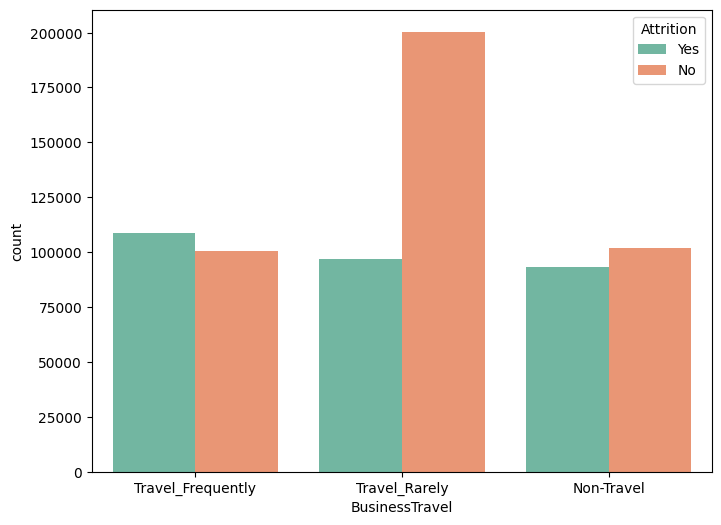

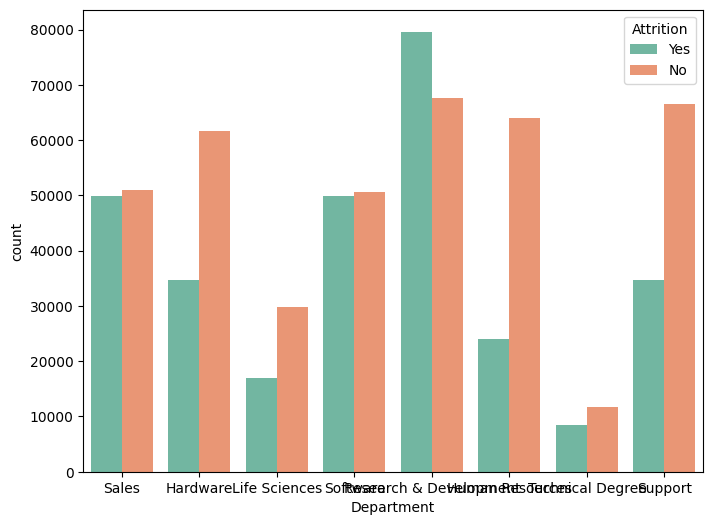

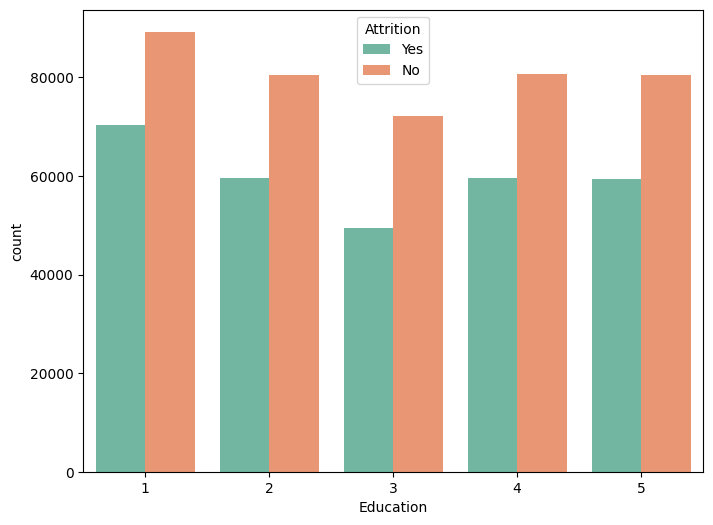

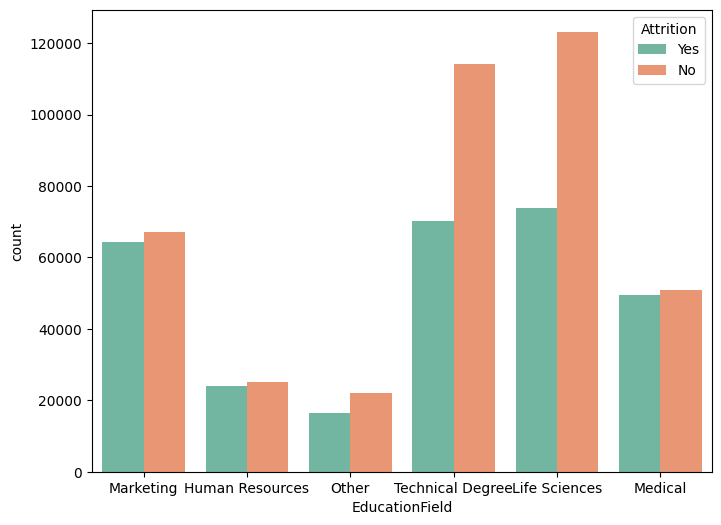

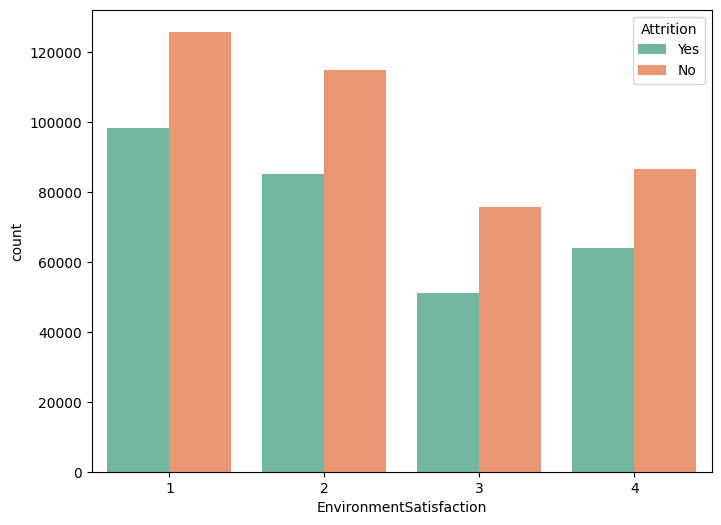

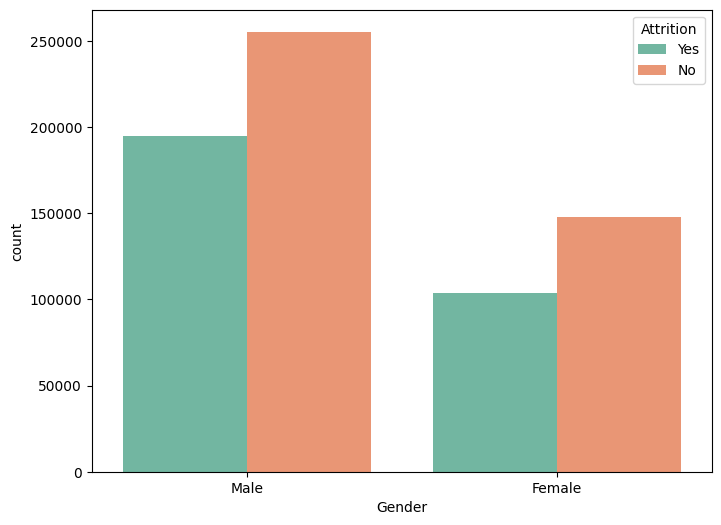

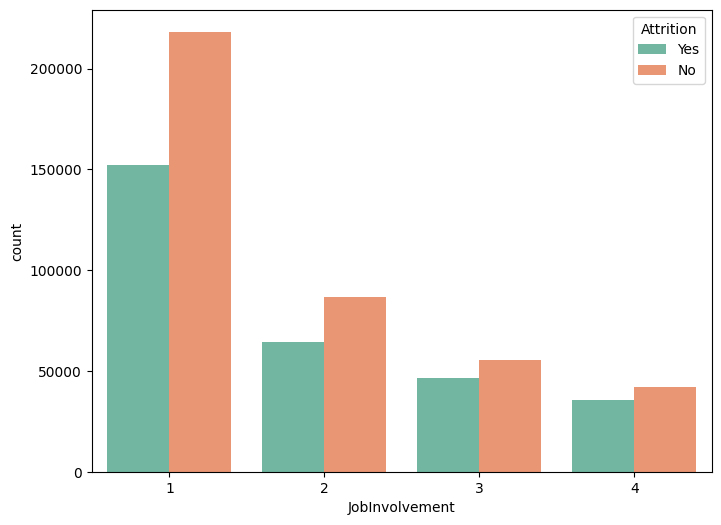

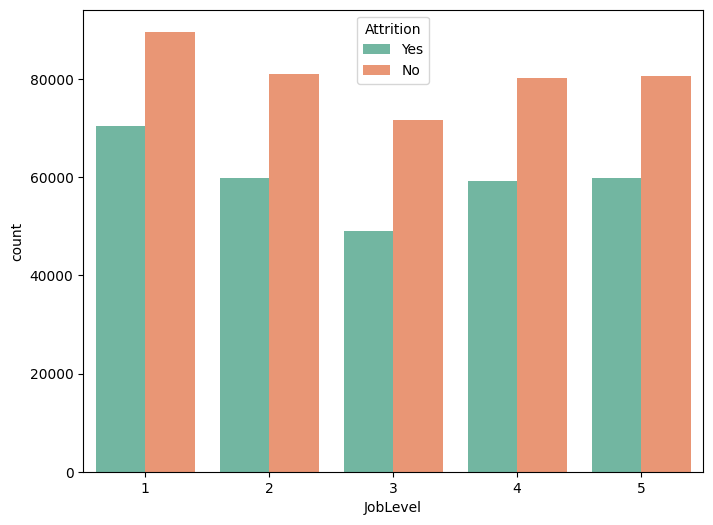

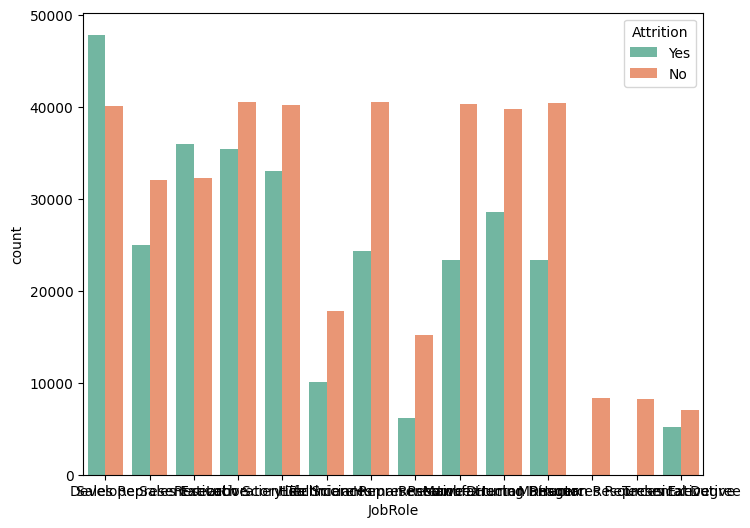

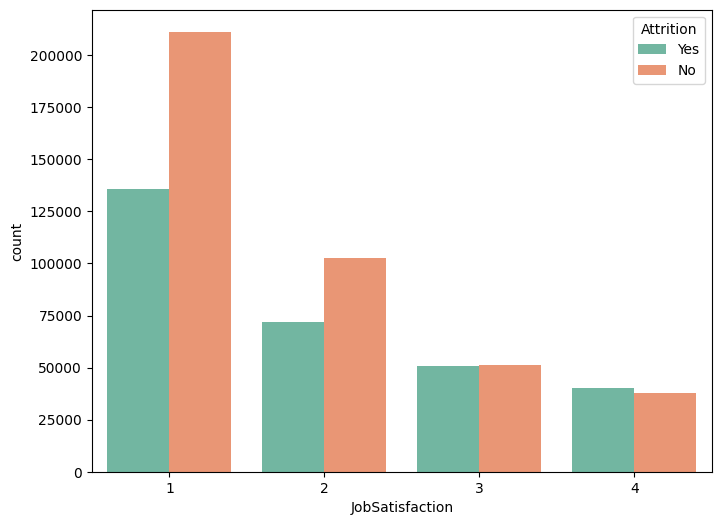

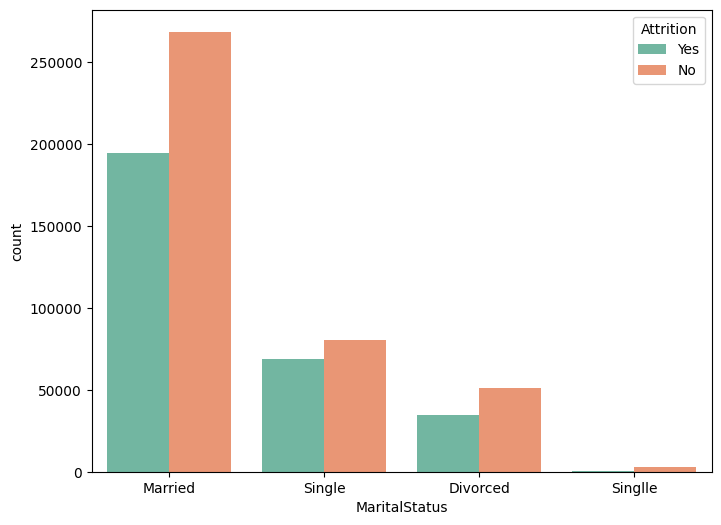

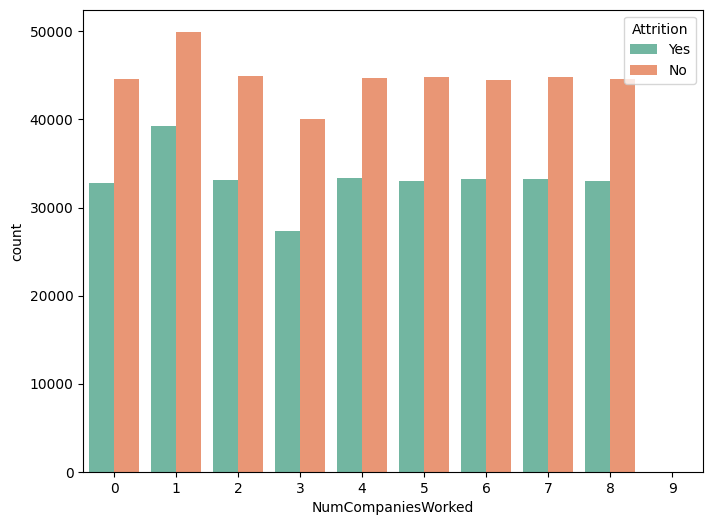

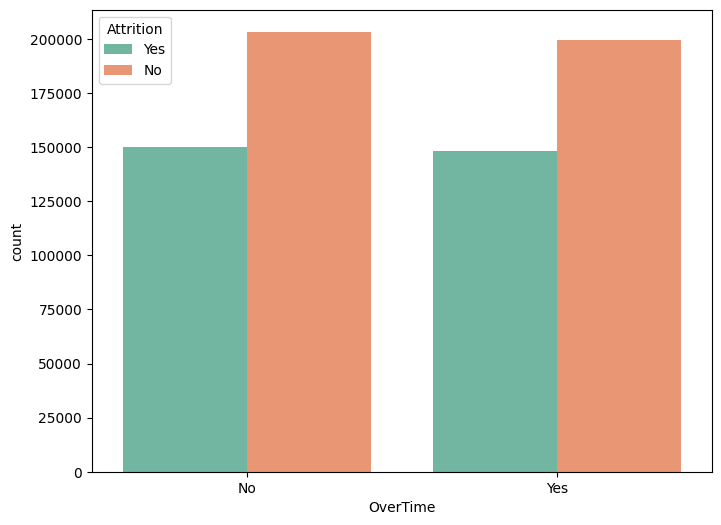

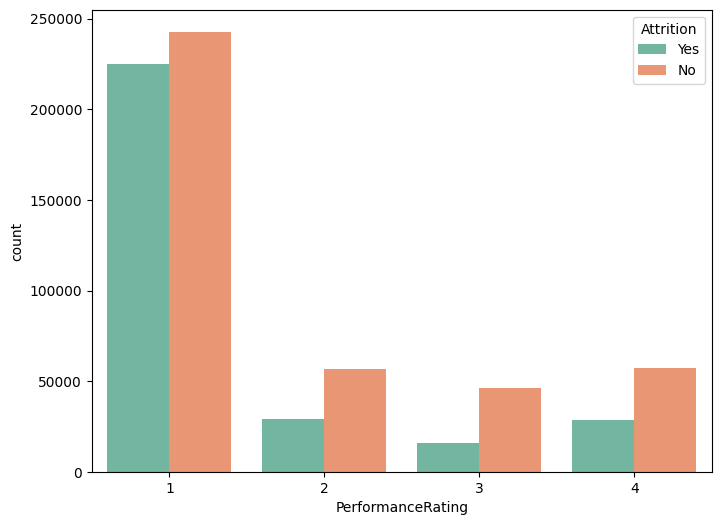

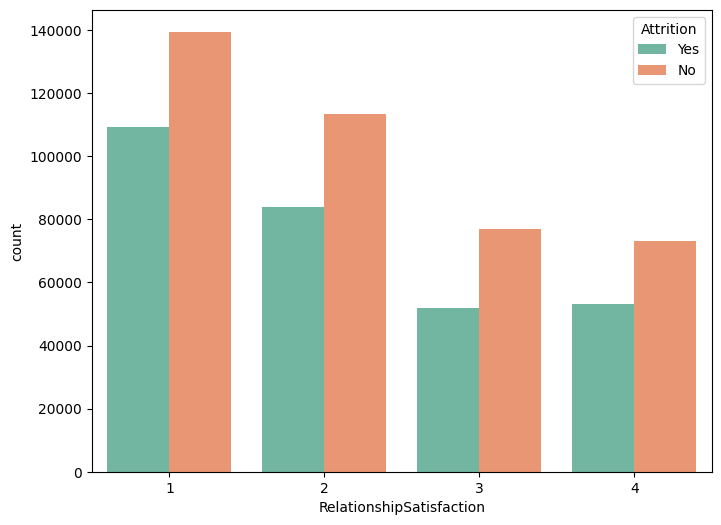

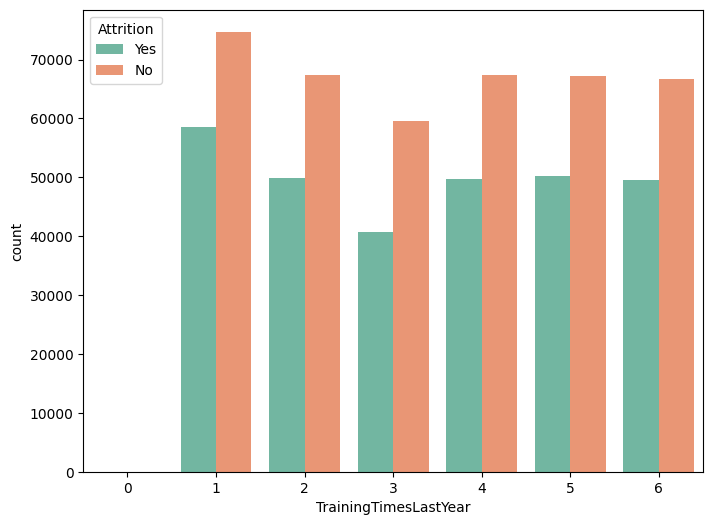

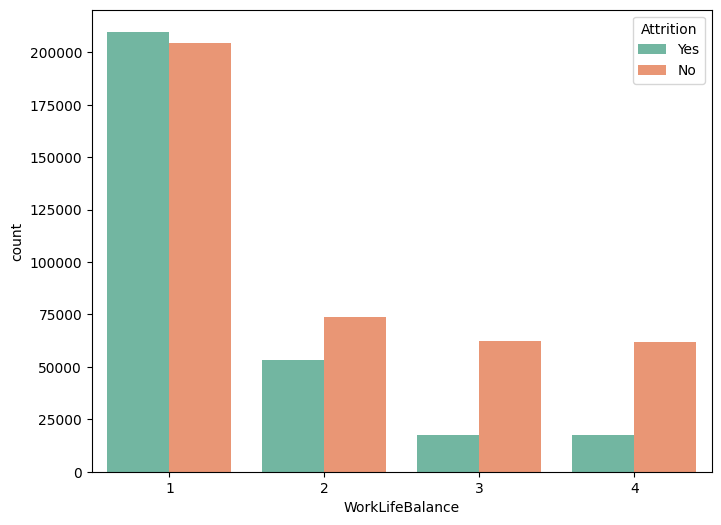

In [12]:
categorical_feature = ['BusinessTravel', 'Department','Education', 'EducationField',
                       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 
                        'JobRole', 'JobSatisfaction', 'MaritalStatus','NumCompaniesWorked', 'OverTime', 'PerformanceRating', 
                        'RelationshipSatisfaction','TrainingTimesLastYear', 'WorkLifeBalance']

for category in categorical_feature:
    plt.figure(figsize = (8,6))
    sns.countplot(x = category, data = data,hue = 'Attrition',palette='Set2')

### Making numeric representation of categorical variables

In [13]:
le = LabelEncoder()
for column in data.columns:
    data[column] = le.fit_transform(data[column])

In [14]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,37,1,1,1029,4,10,0,2,0,388783,...,3,0,4,11,4,0,19,19,18,2
1,3,1,1,1135,0,48,0,0,0,193574,...,0,0,1,12,1,0,10,7,10,2
2,9,1,1,658,4,19,2,4,0,237429,...,0,0,3,33,4,0,9,7,7,3
3,22,0,2,1040,0,47,0,5,0,214938,...,2,0,3,19,6,3,1,1,1,2
4,3,0,2,1059,2,32,4,2,0,151696,...,0,0,1,16,4,0,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701287,37,0,2,641,1,0,1,2,0,164487,...,0,0,1,9,4,3,6,1,6,5
701288,4,1,2,1389,5,21,3,0,0,330383,...,0,0,1,14,2,1,9,6,9,5
701289,30,1,2,280,2,38,2,2,0,429721,...,0,0,3,33,3,0,9,6,8,1
701290,35,0,2,1428,1,23,1,1,0,155905,...,3,0,2,19,2,2,3,1,2,2


Investigate all the elements with each Feature

In [15]:
for column in data.columns:
    unique_vals = data[column].unique()
    length = len(unique_vals)
    
    if length < 18:
        print('The number of values for feature {}:{} ---> {}'.format(column,length,unique_vals))
    else:
        print('The number of values for feature {}:{}'.format(column,length))

The number of values for feature Age:43
The number of values for feature Attrition:2 ---> [1 0]
The number of values for feature BusinessTravel:3 ---> [1 2 0]
The number of values for feature DailyRate:1500
The number of values for feature Department:8 ---> [4 0 2 5 3 1 7 6]
The number of values for feature DistanceFromHome:50
The number of values for feature Education:5 ---> [0 2 4 3 1]
The number of values for feature EducationField:6 ---> [2 0 4 5 1 3]
The number of values for feature EmployeeCount:1 ---> [0]
The number of values for feature EmployeeNumber:467966
The number of values for feature EnvironmentSatisfaction:4 ---> [0 1 3 2]
The number of values for feature Gender:2 ---> [1 0]
The number of values for feature HourlyRate:192
The number of values for feature JobInvolvement:4 ---> [1 0 3 2]
The number of values for feature JobLevel:5 ---> [3 0 4 1 2]
The number of values for feature JobRole:14 ---> [ 0 12 11 10  5  6  1  2  9  8  7  4  3 13]
The number of values for feature 

In [16]:
data.shape

(701292, 35)

#### Dropping unnecesary columns

In [17]:
data.drop(columns=['StandardHours','EmployeeCount','Over18','EmployeeNumber','StockOptionLevel'],inplace=True,axis=1)

In [18]:
data.shape

(701292, 30)

In [19]:
data = data.drop_duplicates()

In [20]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,37,1,1,1029,4,10,0,2,0,1,...,42,0,3,11,4,0,19,19,18,2
1,3,1,1,1135,0,48,0,0,1,0,...,19,0,0,12,1,0,10,7,10,2
2,9,1,1,658,4,19,2,4,1,0,...,47,0,0,33,4,0,9,7,7,3
3,22,0,2,1040,0,47,0,5,3,0,...,47,0,2,19,6,3,1,1,1,2
4,3,0,2,1059,2,32,4,2,1,1,...,18,0,0,16,4,0,2,1,2,1


### Dropping Constant Feature using Varience Threshold Technique

The variance threshold is a simple baseline approach to feature selection.It removes all features which variance doesn't meet some threshold.By default,it removes all zero-variance features, i.e features that have the same values in all samples.
We assume that features with a higher variance may contain more useful information, but note that we are not taking the relationship between feature variables or feature and target variables into account, which is one of the drawback of filter methods.

In [21]:
var_thresh = VarianceThreshold() # by default the threshold = 0
var_thresh.fit(data)

VarianceThreshold()

In [22]:
var_thresh.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

here all features are necesary

In [23]:
print('All features: ',data.columns)

print('Features Selected: ',data.columns[var_thresh.get_support()])

All features:  Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
Features Selected:  Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime'

The get_support returns a Boolean vector where True means that the variable does not have zero variance.

The following code drops the columns based on the variance threshold algorithm

In [24]:
selected_columns = data.columns[var_thresh.get_support()]

for cols in data.columns:
    if cols not in selected_columns:
        data.drop(columns = cols, inplace = True)

In [25]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,37,1,1,1029,4,10,0,2,0,1,...,42,0,3,11,4,0,19,19,18,2
1,3,1,1,1135,0,48,0,0,1,0,...,19,0,0,12,1,0,10,7,10,2
2,9,1,1,658,4,19,2,4,1,0,...,47,0,0,33,4,0,9,7,7,3
3,22,0,2,1040,0,47,0,5,3,0,...,47,0,2,19,6,3,1,1,1,2
4,3,0,2,1059,2,32,4,2,1,1,...,18,0,0,16,4,0,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701287,37,0,2,641,1,0,1,2,0,1,...,15,1,0,9,4,3,6,1,6,5
701288,4,1,2,1389,5,21,3,0,1,0,...,16,0,0,14,2,1,9,6,9,5
701289,30,1,2,280,2,38,2,2,1,1,...,41,0,0,33,3,0,9,6,8,1
701290,35,0,2,1428,1,23,1,1,3,0,...,8,2,3,19,2,2,3,1,2,2


In [26]:
data['Attrition'].value_counts()

0    402914
1    298374
Name: Attrition, dtype: int64

#### Separate independant(x) and dependant(y) features

In [27]:
x = data.drop(columns = 'Attrition')
y = data['Attrition']

In [28]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,37,1,1029,4,10,0,2,0,1,86,...,42,0,3,11,4,0,19,19,18,2
1,3,1,1135,0,48,0,0,1,0,13,...,19,0,0,12,1,0,10,7,10,2
2,9,1,658,4,19,2,4,1,0,100,...,47,0,0,33,4,0,9,7,7,3
3,22,2,1040,0,47,0,5,3,0,58,...,47,0,2,19,6,3,1,1,1,2
4,3,2,1059,2,32,4,2,1,1,143,...,18,0,0,16,4,0,2,1,2,1


In [29]:
y.head()

0    1
1    1
2    1
3    0
4    0
Name: Attrition, dtype: int32

### Train Test Split for finding correlation between features

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=1, stratify=y)

In [87]:
x_train.to_csv('demo.csv')

In [31]:
x_train.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
421890,14,1,453,4,41,2,3,2,1,34,...,35,0,2,5,5,0,8,2,4,3
148332,12,0,479,2,20,0,1,0,1,120,...,33,0,0,29,1,0,29,27,19,3
285192,42,2,539,5,2,3,1,2,1,20,...,33,0,0,8,4,2,1,1,1,2
528961,34,2,397,1,46,0,1,3,1,120,...,30,2,2,8,5,2,5,3,4,3
280641,29,2,1380,1,22,0,5,2,1,71,...,40,3,3,22,1,3,16,1,6,5


In [32]:
y_train.head()

421890    1
148332    0
285192    0
528961    0
280641    0
Name: Attrition, dtype: int32

In [33]:
x_train.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## Feature Selection using Pearson's correlation

In [34]:
corr = x_train.corr()
corr

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.167036,0.005657,-0.085236,-0.050834,0.003613,-0.005152,0.019640,0.008841,0.005370,...,0.012881,0.160995,0.024003,0.139813,0.005854,0.152679,0.001719,-0.003888,0.000202,0.038155
BusinessTravel,0.167036,1.000000,0.001637,-0.099682,-0.003170,0.004955,-0.029842,0.031655,0.002664,0.002714,...,0.006898,0.131667,0.050829,0.045736,0.008433,0.119424,0.001470,0.000261,0.000707,0.027116
DailyRate,0.005657,0.001637,1.000000,-0.002197,0.000109,0.001853,0.000201,-0.000778,-0.002552,-0.000820,...,0.005228,0.002310,0.001000,0.012300,0.002067,0.005428,0.003059,0.000970,-0.000145,0.001259
Department,-0.085236,-0.099682,-0.002197,1.000000,-0.003216,0.003004,0.047669,-0.004066,-0.000427,-0.001738,...,0.003151,-0.011800,-0.003551,0.002882,0.003147,-0.001190,0.000501,-0.000600,0.000836,-0.023060
DistanceFromHome,-0.050834,-0.003170,0.000109,-0.003216,1.000000,0.012985,-0.023961,0.027927,-0.006048,0.002212,...,0.012177,-0.067625,0.030433,-0.090905,0.010479,-0.023509,0.008552,0.006971,0.006206,-0.015552
Education,0.003613,0.004955,0.001853,0.003004,0.012985,1.000000,-0.001453,0.009454,0.000331,0.000945,...,0.008799,-0.013585,0.007784,0.006371,0.006136,0.017564,0.004422,0.002702,0.003449,-0.004860
EducationField,-0.005152,-0.029842,0.000201,0.047669,-0.023961,-0.001453,1.000000,0.030749,0.003192,-0.001434,...,0.000214,0.058898,0.030494,0.045862,-0.000216,0.083820,0.000107,-0.002400,-0.000488,0.000499
EnvironmentSatisfaction,0.019640,0.031655,-0.000778,-0.004066,0.027927,0.009454,0.030749,1.000000,-0.001900,0.001503,...,0.008408,0.014885,0.087597,-0.013156,0.005545,0.120928,0.004326,0.003029,0.001846,0.003672
Gender,0.008841,0.002664,-0.002552,-0.000427,-0.006048,0.000331,0.003192,-0.001900,1.000000,0.000598,...,0.000646,0.006469,-0.001116,0.015611,-0.000727,0.005007,0.000429,-0.001077,0.001817,0.003111
HourlyRate,0.005370,0.002714,-0.000820,-0.001738,0.002212,0.000945,-0.001434,0.001503,0.000598,1.000000,...,0.003862,-0.005625,-0.000991,0.006556,0.003214,0.002738,0.003269,0.002549,0.002587,0.002750


visualizing correlation using a heatmap

<AxesSubplot: >

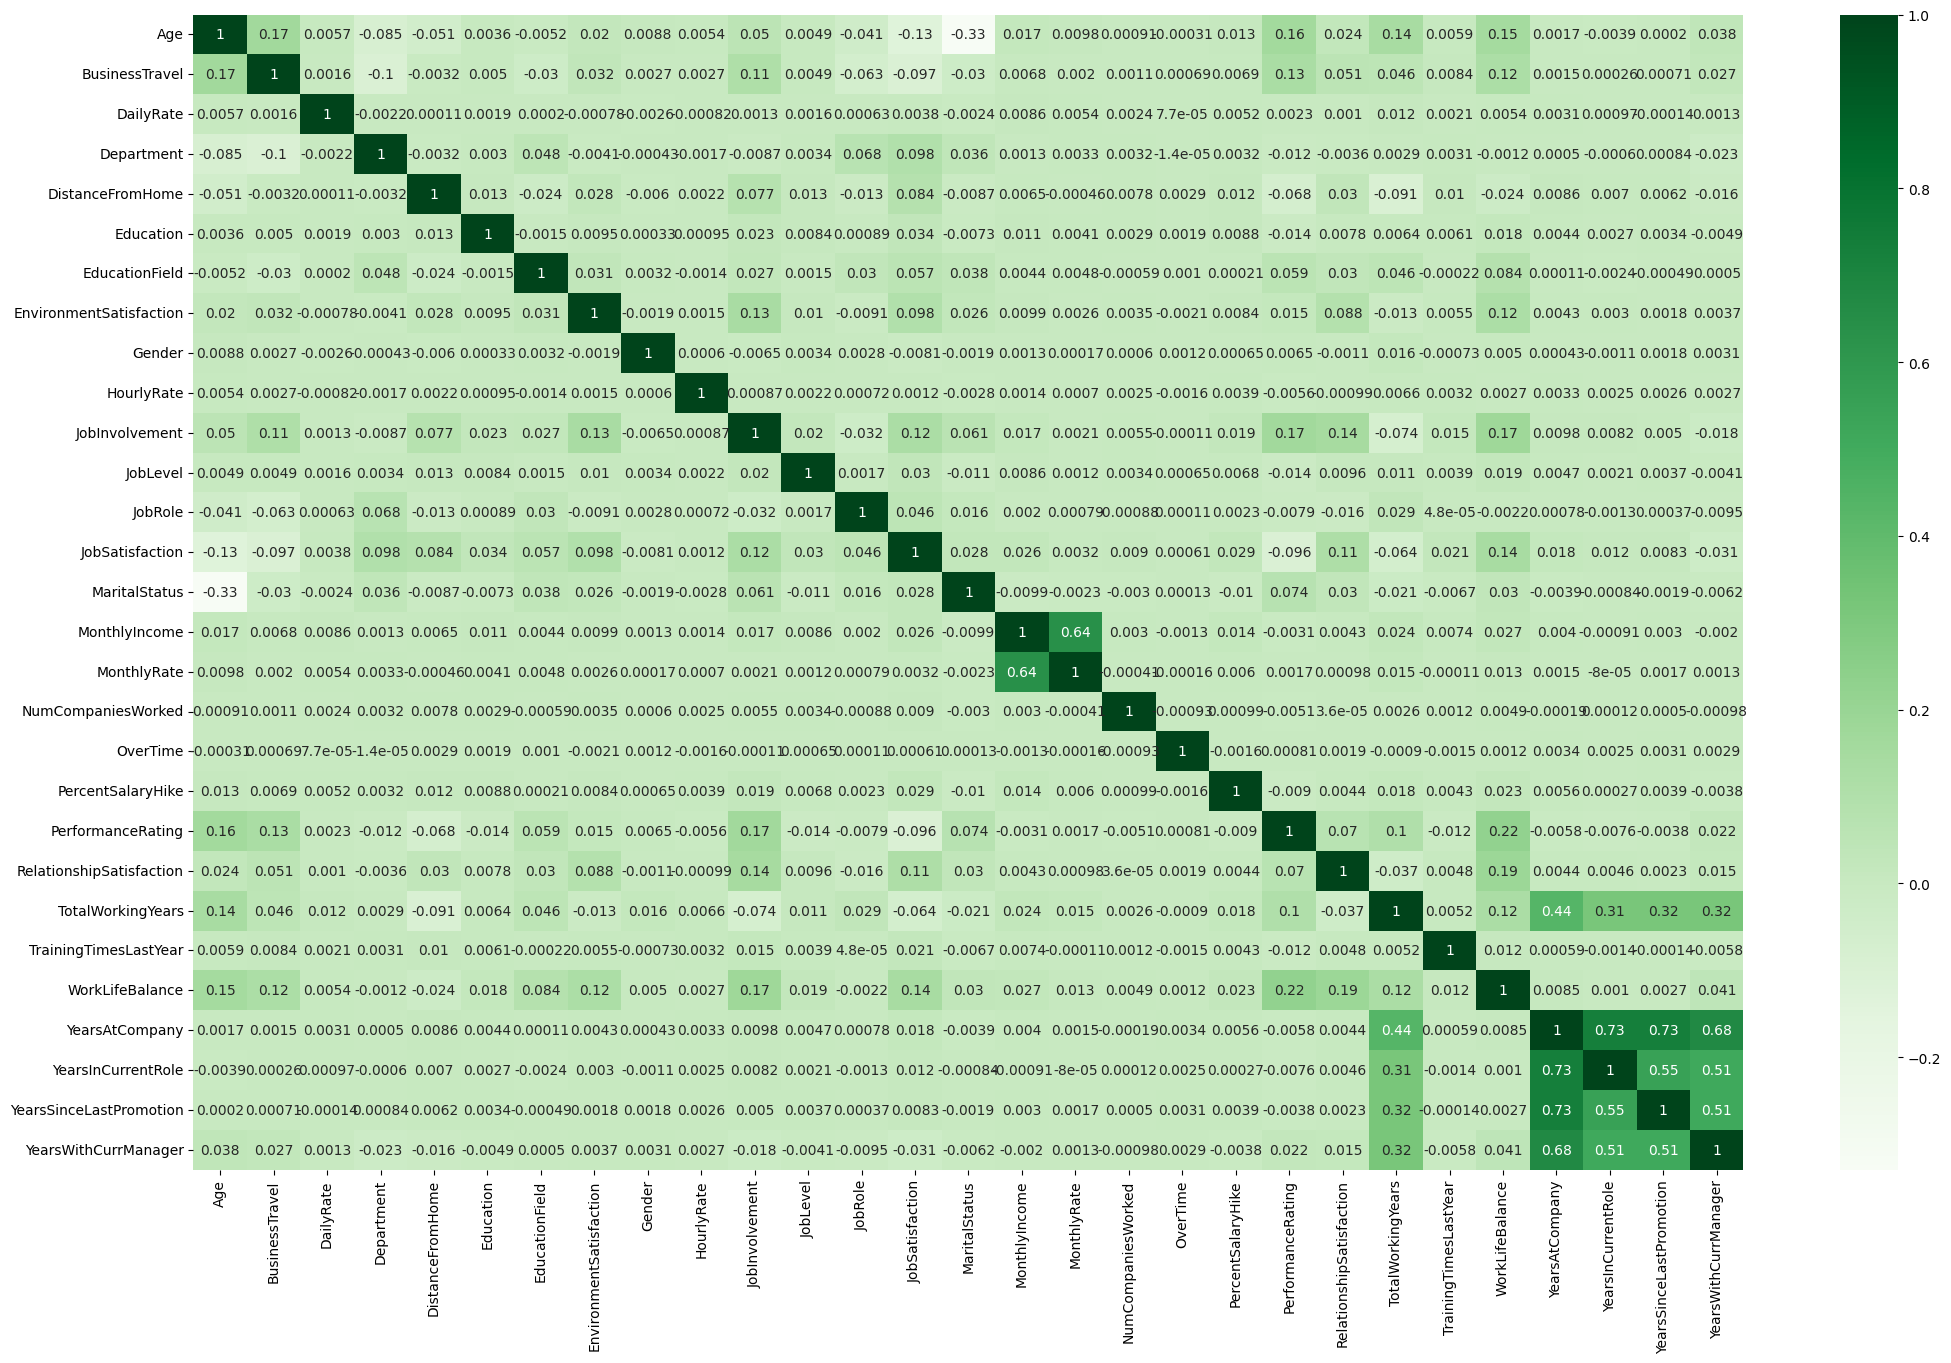

In [35]:
plt.figure(figsize = (25,15))
sns.heatmap(corr, annot = True, cmap = 'Greens')

Use of the mask

<AxesSubplot: >

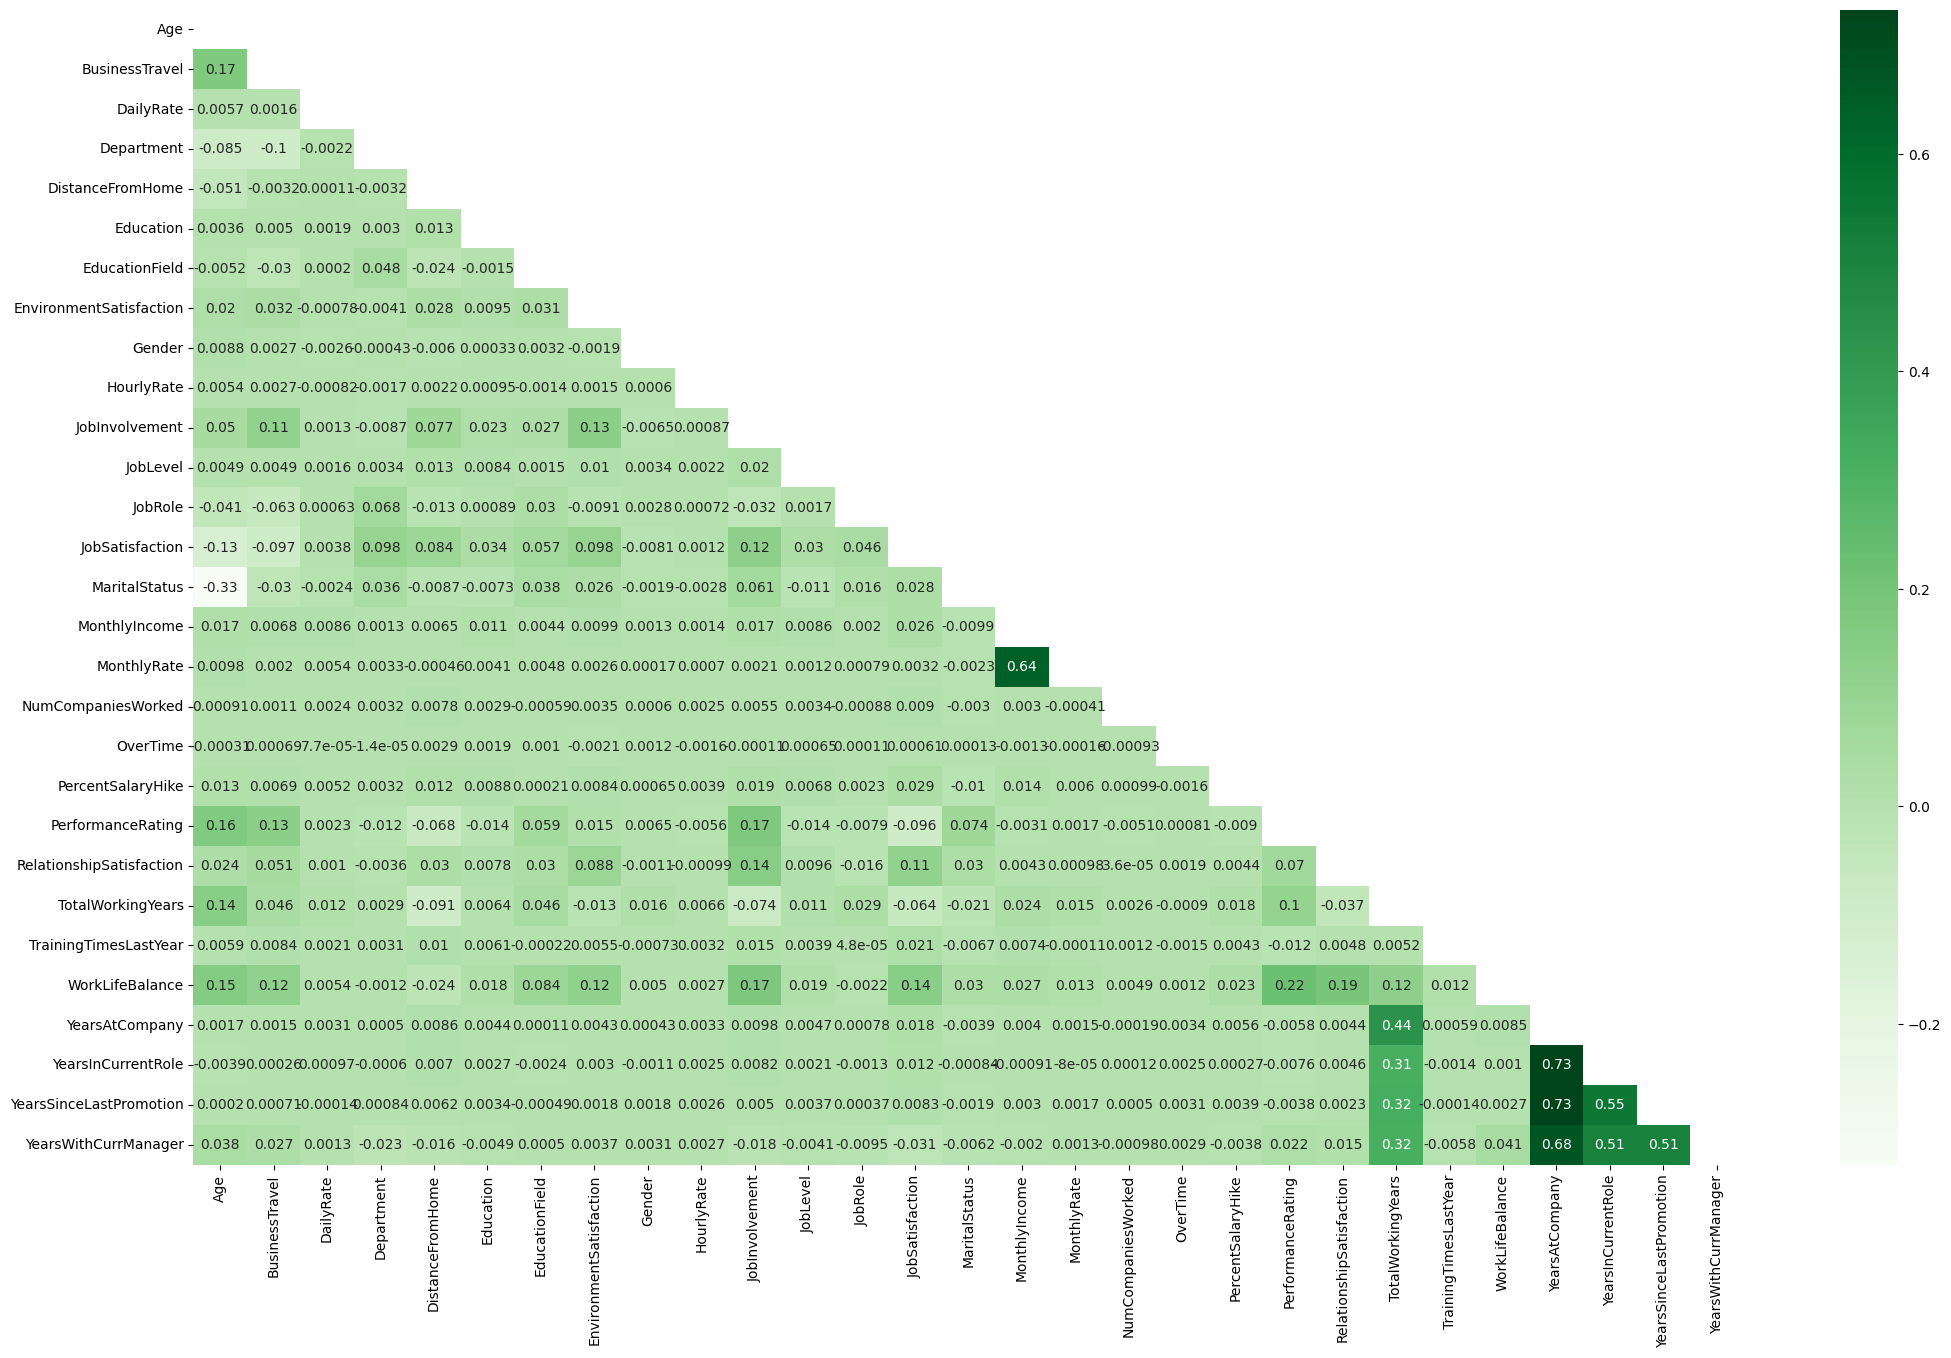

In [36]:
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
fig = plt.figure(figsize = (25,15))
sns.heatmap(corr, annot = True, cmap = 'Greens', mask = mask1)

With the following function we can select highly correlated feature.
It will remove the first feature that is highly correlated with another feature.

In [37]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of the redundant columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i, j])) > threshold:
                colname = corr_matrix.columns[j]
                col_corr.add(colname)
    return col_corr

In [38]:
corr_features = correlation(x_train, 0.75) # 75% is a good value of the threshold
print(len(corr_features))
print(corr_features)

0
set()


In [39]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
chi2_features = SelectKBest(chi2, k = 6) 
X_kbest_features = chi2_features.fit_transform(x, y)
mask=chi2_features.get_support()
new_feature=[]
for bool,feature in zip(mask,x.columns):
    if bool:
        new_feature.append(feature)
list3=new_feature
list3

['Age',
 'DistanceFromHome',
 'MonthlyIncome',
 'MonthlyRate',
 'TotalWorkingYears',
 'WorkLifeBalance']

In [40]:
print(data.shape)
data.head()

(701288, 30)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,37,1,1,1029,4,10,0,2,0,1,...,42,0,3,11,4,0,19,19,18,2
1,3,1,1,1135,0,48,0,0,1,0,...,19,0,0,12,1,0,10,7,10,2
2,9,1,1,658,4,19,2,4,1,0,...,47,0,0,33,4,0,9,7,7,3
3,22,0,2,1040,0,47,0,5,3,0,...,47,0,2,19,6,3,1,1,1,2
4,3,0,2,1059,2,32,4,2,1,1,...,18,0,0,16,4,0,2,1,2,1


#### Convert categorical features to seperate columns

In [41]:
for column in data.columns:
    unique_vals = data[column].unique()
    length = len(unique_vals)
    if length < 18:
        print("The number of values for feature {}: {} ---> {}".format(column, length, unique_vals))
    else:
        print("The number of values for feature {}: {}".format(column, length))

The number of values for feature Age: 43
The number of values for feature Attrition: 2 ---> [1 0]
The number of values for feature BusinessTravel: 3 ---> [1 2 0]
The number of values for feature DailyRate: 1500
The number of values for feature Department: 8 ---> [4 0 2 5 3 1 7 6]
The number of values for feature DistanceFromHome: 50
The number of values for feature Education: 5 ---> [0 2 4 3 1]
The number of values for feature EducationField: 6 ---> [2 0 4 5 1 3]
The number of values for feature EnvironmentSatisfaction: 4 ---> [0 1 3 2]
The number of values for feature Gender: 2 ---> [1 0]
The number of values for feature HourlyRate: 192
The number of values for feature JobInvolvement: 4 ---> [1 0 3 2]
The number of values for feature JobLevel: 5 ---> [3 0 4 1 2]
The number of values for feature JobRole: 14 ---> [ 0 12 11 10  5  6  1  2  9  8  7  4  3 13]
The number of values for feature JobSatisfaction: 4 ---> [0 1 3 2]
The number of values for feature MaritalStatus: 4 ---> [1 2 0 3]


In [42]:
new_raw_data = pd.get_dummies(data,columns = ['BusinessTravel', 'Department',
       'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus','NumCompaniesWorked', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction',
       'TrainingTimesLastYear', 'WorkLifeBalance'])
print(new_raw_data.shape)

(701288, 99)


In [43]:
list(new_raw_data.columns)

['Age',
 'Attrition',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'JobLevel',
 'MonthlyIncome',
 'MonthlyRate',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'BusinessTravel_0',
 'BusinessTravel_1',
 'BusinessTravel_2',
 'Department_0',
 'Department_1',
 'Department_2',
 'Department_3',
 'Department_4',
 'Department_5',
 'Department_6',
 'Department_7',
 'Education_0',
 'Education_1',
 'Education_2',
 'Education_3',
 'Education_4',
 'EducationField_0',
 'EducationField_1',
 'EducationField_2',
 'EducationField_3',
 'EducationField_4',
 'EducationField_5',
 'EnvironmentSatisfaction_0',
 'EnvironmentSatisfaction_1',
 'EnvironmentSatisfaction_2',
 'EnvironmentSatisfaction_3',
 'Gender_0',
 'Gender_1',
 'JobInvolvement_0',
 'JobInvolvement_1',
 'JobInvolvement_2',
 'JobInvolvement_3',
 'JobRole_0',
 'JobRole_1',
 'JobRole_2',
 'JobRole_3',
 'JobRole_4',
 'JobRole_5',
 'JobRole_6',
 'JobRole

#### Train test split for classification

In [44]:
x = new_raw_data.drop(columns = 'Attrition')
y = new_raw_data['Attrition']

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=1,stratify=y)

In [86]:
x_train.to_csv('test.csv')

We need to scale correctly (we will use MinMax scaler to do this)

In [46]:
cols_to_scale = ['Age', 'DailyRate', 'DistanceFromHome','HourlyRate','MonthlyIncome', 'MonthlyRate','PercentSalaryHike',
               'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager',
 'YearsSinceLastPromotion']

scaler = MinMaxScaler()
scaler.fit(x_train[cols_to_scale])
x_train[cols_to_scale] = scaler.transform(x_train[cols_to_scale])
x_test[cols_to_scale] = scaler.transform(x_test[cols_to_scale])

In [47]:
x_train.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,...,TrainingTimesLastYear_1,TrainingTimesLastYear_2,TrainingTimesLastYear_3,TrainingTimesLastYear_4,TrainingTimesLastYear_5,TrainingTimesLastYear_6,WorkLifeBalance_0,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3
421890,0.333333,0.302201,0.836735,0.178010,3,0.480831,0.401731,0.714286,0.125,0.200,...,0,0,0,0,1,0,1,0,0,0
148332,0.285714,0.319546,0.408163,0.628272,3,0.268146,0.468948,0.673469,0.725,0.725,...,1,0,0,0,0,0,1,0,0,0
285192,1.000000,0.359573,0.040816,0.104712,3,0.426681,0.613672,0.673469,0.200,0.025,...,0,0,0,1,0,0,0,0,1,0
528961,0.809524,0.264843,0.938776,0.628272,4,0.848735,0.155033,0.612245,0.200,0.125,...,0,0,0,0,1,0,0,0,1,0
280641,0.690476,0.920614,0.448980,0.371728,4,0.543641,0.378736,0.816327,0.550,0.400,...,1,0,0,0,0,0,0,0,0,1


In [48]:
x_test.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,...,TrainingTimesLastYear_1,TrainingTimesLastYear_2,TrainingTimesLastYear_3,TrainingTimesLastYear_4,TrainingTimesLastYear_5,TrainingTimesLastYear_6,WorkLifeBalance_0,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3
402496,0.857143,0.370247,0.183673,0.115183,0,0.428509,0.394342,0.693878,0.075,0.075,...,0,1,0,0,0,0,1,0,0,0
208662,0.380952,0.606404,0.530612,0.753927,0,0.724087,0.561125,0.653061,0.825,0.050,...,0,0,0,1,0,0,1,0,0,0
20954,0.333333,0.060040,0.591837,0.989529,1,0.478269,0.694672,0.244898,0.125,0.100,...,0,1,0,0,0,0,1,0,0,0
476208,0.380952,0.555037,0.244898,0.356021,4,0.312502,0.407871,0.734694,0.675,0.300,...,1,0,0,0,0,0,1,0,0,0
436923,0.452381,0.603069,0.163265,0.240838,1,0.264968,0.379260,0.775510,0.975,0.300,...,0,1,0,0,0,0,0,0,0,1


# Classification Algorithms

#### Decision Tree

In [49]:
# prepronning
parameter={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
treemodel = DecisionTreeClassifier()
cv = GridSearchCV(treemodel,param_grid=parameter,cv=5,scoring='accuracy')

In [52]:
cv.fit(x_train,y_train)

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [53]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'splitter': 'best'}

In [54]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x,y)

In [55]:
clf = tree.DecisionTreeClassifier(random_state=0,max_depth = 5,criterion='entropy')
clf = clf.fit(x, y)

[Text(0.51875, 0.9166666666666666, 'x[0] <= 23.5\nentropy = 0.984\nsamples = 701288\nvalue = [402914, 298374]'),
 Text(0.26666666666666666, 0.75, 'x[2] <= 28.5\nentropy = 0.987\nsamples = 388387\nvalue = [167873, 220514]'),
 Text(0.13333333333333333, 0.5833333333333334, 'x[94] <= 0.5\nentropy = 0.961\nsamples = 185174\nvalue = [114112, 71062]'),
 Text(0.06666666666666667, 0.4166666666666667, 'x[79] <= 0.5\nentropy = 0.84\nsamples = 67514\nvalue = [49375, 18139]'),
 Text(0.03333333333333333, 0.25, 'x[0] <= 22.5\nentropy = 0.975\nsamples = 30231\nvalue = [17898, 12333]'),
 Text(0.016666666666666666, 0.08333333333333333, 'entropy = 0.981\nsamples = 28116\nvalue = [16348, 11768]'),
 Text(0.05, 0.08333333333333333, 'entropy = 0.837\nsamples = 2115\nvalue = [1550, 565]'),
 Text(0.1, 0.25, 'x[63] <= 0.5\nentropy = 0.624\nsamples = 37283\nvalue = [31477, 5806]'),
 Text(0.08333333333333333, 0.08333333333333333, 'entropy = 0.68\nsamples = 31727\nvalue = [26014, 5713]'),
 Text(0.11666666666666667

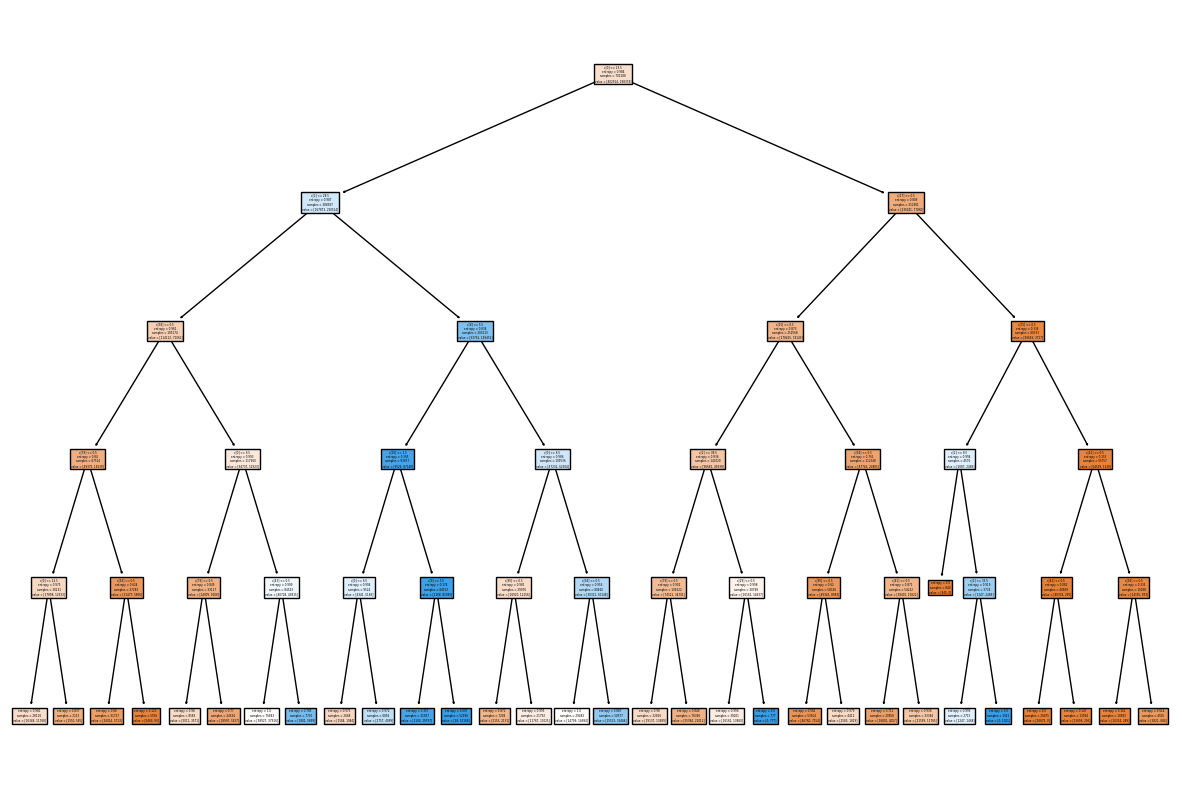

In [56]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

In [57]:
print(tree.export_text(clf))

|--- feature_0 <= 23.50
|   |--- feature_2 <= 28.50
|   |   |--- feature_94 <= 0.50
|   |   |   |--- feature_79 <= 0.50
|   |   |   |   |--- feature_0 <= 22.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  22.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_79 >  0.50
|   |   |   |   |--- feature_63 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_63 >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- feature_94 >  0.50
|   |   |   |--- feature_0 <= 6.50
|   |   |   |   |--- feature_79 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_79 >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  6.50
|   |   |   |   |--- feature_43 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_43 >  0.50
|   |   |   |   |   |--- class: 1
|   |--- feature_2 >  28.50
|   |   |--- feature_8 <= 5.50
|   |   |   |--- feature_10 <= 1.50
|   |   |   |   |--- feature_0 <= 6.50
|   |   |   |   

In [58]:
y_predict = clf.predict(x_test)

In [59]:
from sklearn.metrics import accuracy_score,classification_report

In [60]:
score = accuracy_score(y_predict,y_test)
print(score)

0.5745340729227566


In [61]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       1.00      0.57      0.73    140258
           1       0.00      0.00      0.00         0

    accuracy                           0.57    140258
   macro avg       0.50      0.29      0.36    140258
weighted avg       1.00      0.57      0.73    140258



C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [62]:
from sklearn.tree import plot_tree

In [63]:
print(clf.feature_importances_)

[0.32384487 0.         0.21135315 0.         0.         0.
 0.         0.         0.14494323 0.01539487 0.05368466 0.
 0.         0.         0.         0.05823161 0.         0.06703472
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.0045326
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.01121487
 0.00243722 0.00845677 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.005338   0.         0.00986268
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.0332061  0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.05046465 0.
 0.         0.        ]


In [64]:
df = pd.DataFrame({'Feature_names':x.columns,'Importance':clf.feature_importances_})

In [65]:
df

,Feature_names,Importance
0,Age,0.323845
1,DailyRate,0.000000
2,DistanceFromHome,0.211353
3,HourlyRate,0.000000
4,JobLevel,0.000000
...,...,...
93,TrainingTimesLastYear_6,0.000000
94,WorkLifeBalance_0,0.050465
95,WorkLifeBalance_1,0.000000
96,WorkLifeBalance_2,0.000000


In [66]:
df_1 = df.sort_values(by = 'Importance',ascending=False)

In [67]:
df_1

,Feature_names,Importance
0,Age,0.323845
2,DistanceFromHome,0.211353
8,TotalWorkingYears,0.144943
17,Department_1,0.067035
15,BusinessTravel_2,0.058232
...,...,...
34,EducationField_5,0.000000
33,EducationField_4,0.000000
32,EducationField_3,0.000000
31,EducationField_2,0.000000


### Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
model_tree = RandomForestClassifier(n_estimators = 20,max_depth=5)
model_tree.fit(x_train, y_train)
pred = model_tree.predict(x_test)


In [70]:

print("Accuracy Score: ",accuracy_score(pred,y_test))
print("Confusion Matrix:\n",confusion_matrix(pred,y_test))
print("Classification Report: \n",classification_report(pred,y_test))

Accuracy Score:  0.7155313778893183
Confusion Matrix:
 [[72164 31480]
 [ 8419 28195]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.70      0.78    103644
           1       0.47      0.77      0.59     36614

    accuracy                           0.72    140258
   macro avg       0.68      0.73      0.68    140258
weighted avg       0.79      0.72      0.73    140258



### XGBoost

In [71]:
from xgboost import XGBClassifier  #Import packages related to Model
Model = "XGBClassifier()"
Model=XGBClassifier() 
Model.fit(x_train, y_train)
pred = Model.predict(x_test)

print("Accuracy Score: ",accuracy_score(pred,y_test))
print("Confusion Matrix:",confusion_matrix(pred,y_test))
print("Classification Report: ",classification_report(pred,y_test))

Accuracy Score:  0.7690470418799641
Confusion Matrix: [[69938 21748]
 [10645 37927]]
Classification Report:                precision    recall  f1-score   support

           0       0.87      0.76      0.81     91686
           1       0.64      0.78      0.70     48572

    accuracy                           0.77    140258
   macro avg       0.75      0.77      0.76    140258
weighted avg       0.79      0.77      0.77    140258



## Logistic regression

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)

print("Accuracy Score: ",accuracy_score(pred,y_test))
print("Confusion Matrix:",confusion_matrix(pred,y_test))
print("Classification Report: ",classification_report(pred,y_test))

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score:  0.7005090618716936
Confusion Matrix: [[63510 24933]
 [17073 34742]]
Classification Report:                precision    recall  f1-score   support

           0       0.79      0.72      0.75     88443
           1       0.58      0.67      0.62     51815

    accuracy                           0.70    140258
   macro avg       0.69      0.69      0.69    140258
weighted avg       0.71      0.70      0.70    140258



## GradientBoostingClassifier

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)

In [74]:
gradient_booster.fit(x_train,y_train)

GradientBoostingClassifier()

In [75]:
y_pred=gradient_booster.predict(x_test)

In [76]:
print("Accuracy Score: ",accuracy_score(y_pred,y_test))
print("Confusion Matrix:",confusion_matrix(y_pred,y_test))

Accuracy Score:  0.7475366823995779
Confusion Matrix: [[69122 23949]
 [11461 35726]]


In [77]:
print(classification_report(y_test,gradient_booster.predict(x_test)))

              precision    recall  f1-score   support

           0       0.74      0.86      0.80     80583
           1       0.76      0.60      0.67     59675

    accuracy                           0.75    140258
   macro avg       0.75      0.73      0.73    140258
weighted avg       0.75      0.75      0.74    140258



In [78]:
final_roc_auc = []

In [79]:
probas1 = clf.predict_proba(x_test)[:, 1]
probas2 = model_tree.predict_proba(x_test)[:, 1]
probas3 = Model.predict_proba(x_test)[:, 1]
probas4 = model.predict_proba(x_test)[:, 1]
probas6 =gradient_booster.predict_proba(x_test)[:, 1]

In [80]:
# get False Positive Rates and True Postive rates for the Classifiers because these will be used to plot the ROC Curve.
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, probas1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, probas2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, probas3)
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y_test, probas4)
false_positive_rate6, true_positive_rate6, threshold6 = roc_curve(y_test, probas6)

In [81]:
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, probas1))
print('roc_auc_score for Random Forest Classifier', roc_auc_score(y_test, probas2))
print('roc_auc_score for XGboost: ', roc_auc_score(y_test, probas3))
print('roc_auc_score for Logistic regression: ', roc_auc_score(y_test, probas4))
print('roc_auc_score for Gradient Boosting classifier: ', roc_auc_score(y_test, probas6))

roc_auc_score for DecisionTree:  0.45792627440347905
roc_auc_score for Random Forest Classifier 0.7871211777310678
roc_auc_score for XGboost:  0.8718010030183214
roc_auc_score for Logistic regression:  0.7686352172722266
roc_auc_score for Gradient Boosting classifier:  0.8340788997042037


In [82]:
final_roc_auc.append({'model_name': 'Decision Tree Classifier', 'fpr': false_positive_rate1, 'tpr': true_positive_rate1, 'auc': roc_auc_score(y_test, probas1)})
final_roc_auc.append({'model_name': 'Random Forest Classifier', 'fpr': false_positive_rate2, 'tpr': true_positive_rate2, 'auc': roc_auc_score(y_test, probas2)})
final_roc_auc.append({'model_name': ' XGboost', 'fpr': false_positive_rate3, 'tpr': true_positive_rate3, 'auc': roc_auc_score(y_test, probas3)})
final_roc_auc.append({'model_name': 'Logistic regression', 'fpr': false_positive_rate4, 'tpr': true_positive_rate4, 'auc': roc_auc_score(y_test, probas4)})
final_roc_auc.append({'model_name': 'Gradient Boosting classifier', 'fpr': false_positive_rate6, 'tpr': true_positive_rate6, 'auc': roc_auc_score(y_test, probas6)})


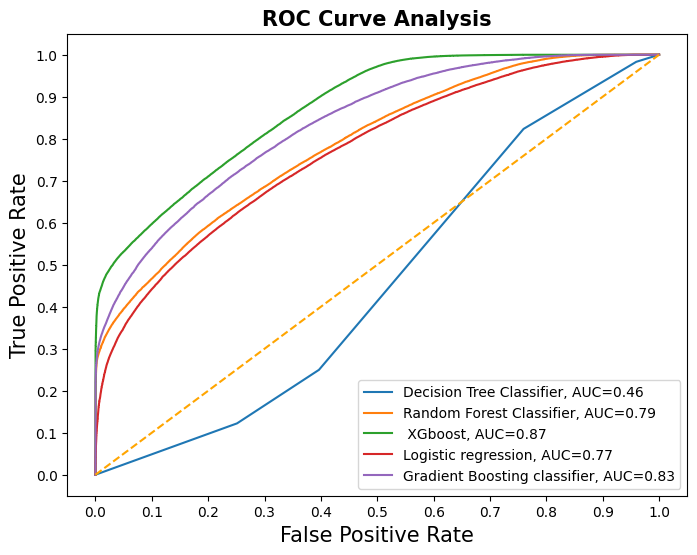

In [83]:
fig = plt.figure(figsize=(8,6))

for m in final_roc_auc:
    plt.plot(m['fpr'], 
             m['tpr'], 
             label="{}, AUC={:.2f}".format(m['model_name'], m['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':10}, loc='lower right')

plt.show()